<a href="https://colab.research.google.com/github/ariondmk/Arion-Damanik/blob/main/ARION%20DAMANIK%20PYTHON%20TUGAS%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [244]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [245]:
# TUGAS PYTHON ARION DAMANIK PRESENSI MINGGU 11

In [246]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from PIL import Image
from imutils import paths
import numpy as np
import os
import cv2

In [247]:
print("[INFO] Loading Images ...")
image_paths = paths.list_images('3scene')
data = []
labels = []

for image_path in image_paths :
  image = Image.open(image_path)
  image = np.array(image.resize((128,128))) / 255.0
  data.append(image)
  
  label = image_path.split(os.path.sep)[-2]
  labels.append(label)

[INFO] Loading Images ...


In [248]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.3, shuffle=True)

In [249]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu')) 
model.add(Dense(5, activation='softmax'))

In [250]:
#  model = Sequential(
#      [
#     Flatten(input_shape=(64*64*3,)),
#      Dense(144, activation="relu", name="layer1"),
#      Dense(24, activation="relu", name="layer2"),
#      Dense(24, activation="relu", name="layer3"),
#      Dense(24, activation="relu", name="layer4"),
#      Dense(3, activation="softmax", name="layer5"),
#      ]
#  )

In [251]:
print("[INFO] training network ...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=200, batch_size=32)

[INFO] training network ...
Epoch 1/200
13/13 [==============================] - 1s 83ms/step - loss: 1.6111 - accuracy: 0.2230 - val_loss: 1.6074 - val_accuracy: 0.2557
Epoch 2/200
13/13 [==============================] - 1s 71ms/step - loss: 1.5990 - accuracy: 0.2721 - val_loss: 1.6054 - val_accuracy: 0.1989
Epoch 3/200
13/13 [==============================] - 1s 70ms/step - loss: 1.5765 - accuracy: 0.2892 - val_loss: 1.5965 - val_accuracy: 0.2045
Epoch 4/200
13/13 [==============================] - 1s 71ms/step - loss: 1.5434 - accuracy: 0.2917 - val_loss: 1.6156 - val_accuracy: 0.2102
Epoch 5/200
13/13 [==============================] - 1s 70ms/step - loss: 1.4935 - accuracy: 0.2917 - val_loss: 1.4793 - val_accuracy: 0.2955
Epoch 6/200
13/13 [==============================] - 1s 71ms/step - loss: 1.3668 - accuracy: 0.3799 - val_loss: 1.3678 - val_accuracy: 0.3523
Epoch 7/200
13/13 [==============================] - 1s 71ms/step - loss: 1.3763 - accuracy: 0.3897 - val_loss: 1.4104 -

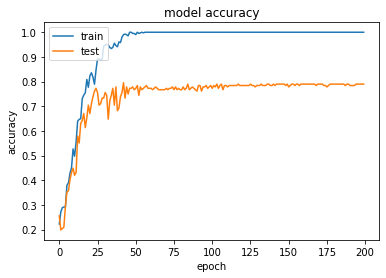

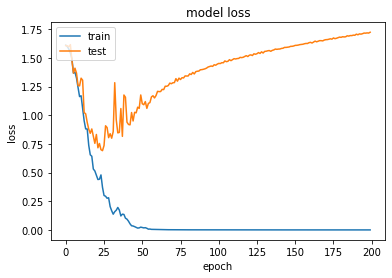

In [252]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [253]:
print("[INFO] evaluating network ...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network ...
              precision    recall  f1-score   support

      GMB_01       0.77      0.73      0.75        37
      GMB_02       0.75      0.83      0.79        29
      GMB_03       0.85      0.85      0.85        34
      GMB_04       0.81      0.71      0.75        41
      GMB_05       0.77      0.86      0.81        35

    accuracy                           0.79       176
   macro avg       0.79      0.79      0.79       176
weighted avg       0.79      0.79      0.79       176



In [254]:
#model.save('nnmodel_scene')

In [255]:
#  images = ['forest_test.jpg', 'coast_test.jpg']
#  for i in range(2) :
#    img_array = cv2.imread(images[i])
#    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
#    plt.imshow(img_array)
#    plt.show()
#    image_test = Image.open(images[i])
#    image_test = np.array(image_test.resize((64,64))) /255.0
#    image_test = np.expand_dims(image_test, axis=0)
#    output = model.predict(image_test, 1)
#    print(output)
#    print(lb.classes_[output.argmax(axis=1)])